In [1]:
import os
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import scipy.stats as stats


In [2]:
df=pd.read_csv('C:\\Users\\POOJA\\Downloads\\kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
df["classification"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [7]:
for i in df.drop("id",axis=1).columns:
    print('Unique Values in "{}":\n'.format(i),df[i].unique(), "\n\n")

Unique Values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] 


Unique Values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] 


Unique Values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025] 


Unique Values in "al":
 [ 1.  4.  2.  3.  0. nan  5.] 


Unique Values in "su":
 [ 0.  3.  4.  1. nan  2.  5.] 


Unique Values in "rbc":
 [nan 'normal' 'abnormal'] 


Unique Values in "pc":
 ['normal' 'abnormal' nan] 


Unique Values in "pcc":
 ['notpresent' 'present' nan] 


Unique Values in "ba":
 ['notpresent' 'present' nan] 


Unique Values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 17

In [8]:
columns_to_clean = ['pcv', 'wc', 'rc', 'dm', 'cad', 'classification']

# Remove '\t' in the specified columns
df[columns_to_clean] = df[columns_to_clean].replace(to_replace={'\t': ''}, regex=True)
df[columns_to_clean] = df[columns_to_clean].replace(to_replace={'?': np.nan})

In [9]:
for i in df.drop("id",axis=1).columns:
    print('Unique Values in "{}":\n'.format(i),df[i].unique(), "\n\n")

Unique Values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] 


Unique Values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] 


Unique Values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025] 


Unique Values in "al":
 [ 1.  4.  2.  3.  0. nan  5.] 


Unique Values in "su":
 [ 0.  3.  4.  1. nan  2.  5.] 


Unique Values in "rbc":
 [nan 'normal' 'abnormal'] 


Unique Values in "pc":
 ['normal' 'abnormal' nan] 


Unique Values in "pcc":
 ['notpresent' 'present' nan] 


Unique Values in "ba":
 ['notpresent' 'present' nan] 


Unique Values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 17

In [10]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [11]:
df["age"] = df["age"].replace(np.NaN, df["age"].median())

In [12]:
df.bp.unique()

array([ 80.,  50.,  70.,  90.,  nan, 100.,  60., 110., 140., 180., 120.])

In [13]:
df.bp.mode()[0]

80.0

In [14]:
df.bp = df.bp.replace(np.NaN, df.bp.mode()[0])

In [15]:
df.sg.unique()

array([1.02 , 1.01 , 1.005, 1.015,   nan, 1.025])

In [16]:
df.sg = df.sg.replace(np.NaN, df.sg.mode()[0])

In [17]:
df.al.unique()

array([ 1.,  4.,  2.,  3.,  0., nan,  5.])

In [18]:
df.al = df.al.replace(np.NaN, df.al.mode()[0])

In [19]:
df.su.unique()

array([ 0.,  3.,  4.,  1., nan,  2.,  5.])

In [20]:
df.su = df.su.replace(np.NaN, df.su.mode()[0])

In [21]:
df.rbc.unique()

array([nan, 'normal', 'abnormal'], dtype=object)

In [22]:
df.rbc = df.rbc.replace(np.NaN, df.rbc.mode()[0])

In [23]:
df.pc.unique()

array(['normal', 'abnormal', nan], dtype=object)

In [24]:
df.pc = df.pc.replace(np.NaN, df.pc.mode()[0])

In [25]:
df.pcc.unique()

array(['notpresent', 'present', nan], dtype=object)

In [26]:
df.pcc = df.pcc.replace(np.NaN, df.pcc.mode()[0])

In [27]:
df.ba.unique()

array(['notpresent', 'present', nan], dtype=object)

In [28]:
df.ba = df.ba.replace(np.NaN, df.ba.mode()[0])


In [29]:
df.bgr.median()

121.0

In [30]:
df.bgr = df.bgr.replace(np.NaN, df.bgr.median())

In [31]:
df.bu.median()

42.0

In [32]:
df.bu = df.bu.replace(np.NaN, df.bu.median())

In [33]:
df.sc = df.sc.replace(np.NaN, df.sc.median())

In [34]:
df.sod = df.sod.replace(np.NaN, df.sod.median())

In [35]:
df.pot = df.pot.replace(np.NaN, df.pot.median())

In [36]:
df.hemo = df.hemo.replace(np.NaN, df.hemo.median())

In [37]:
df.pcv = df.pcv.replace(np.NaN, df.pcv.median())

In [38]:
df.wc = df.wc.replace(np.NaN, df.wc.median())

In [39]:
df.rc = df.rc.replace(np.NaN, df.rc.median())

In [40]:
df.htn.unique()

array(['yes', 'no', nan], dtype=object)

In [41]:
df.htn = df.htn.replace(np.NaN, df.htn.mode()[0])


In [42]:
df.dm = df.dm.replace(np.NaN, df.dm.mode()[0])

In [43]:
df.cad = df.cad.replace(np.NaN, df.cad.mode()[0])

In [44]:
df.appet = df.appet.replace(np.NaN, df.appet.mode()[0])

In [45]:
df.pe = df.pe.replace(np.NaN, df.pe.mode()[0])

In [46]:
df.ane = df.ane.replace(np.NaN, df.ane.mode()[0])

In [47]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [48]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [49]:
df['rc'] = df['rc'].astype('float64')
df[['pcv', 'wc', 'age']] = df[['pcv', 'wc', 'age']].astype('int64')
df.dtypes

id                  int64
age                 int64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int64
wc                  int64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [50]:
df.drop('id',axis=1,inplace=True)

<AxesSubplot:xlabel='classification', ylabel='count'>

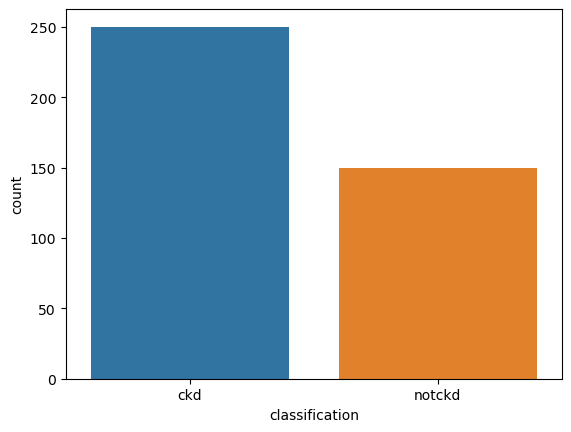

In [51]:
sns.countplot(x = "classification", data = df)

<AxesSubplot:>

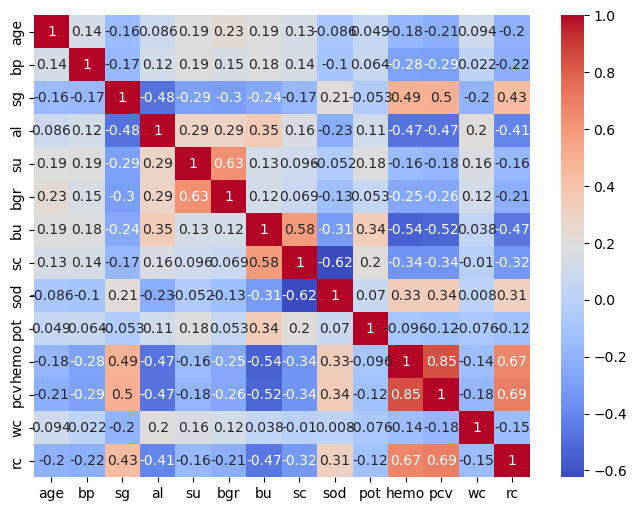

In [52]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [53]:
from sklearn.preprocessing import LabelEncoder
col = ['rbc', 'pcc', 'pc', 'ba', 'htn', 'dm', 'cad', 'pe', 'ane']
encoder = LabelEncoder()

for col_name in col:
    df[col_name] = encoder.fit_transform(df[col_name])

# Replace specific values in 'appet' and 'classification' columns
df[['appet', 'classification']] = df[['appet', 'classification']].replace({'good': '1', 'ckd': '1', 'notckd': '0', 'poor': '0'})

In [54]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [55]:
df.dtypes

age                 int64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int32
pc                  int32
pcc                 int32
ba                  int32
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int64
wc                  int64
rc                float64
htn                 int32
dm                  int32
cad                 int32
appet              object
pe                  int32
ane                 int32
classification     object
dtype: object

In [56]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44,7800,5.2,1,2,0,1,0,0,1
1,7,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38,6000,4.8,0,1,0,1,0,0,1
2,62,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31,7500,4.8,0,2,0,0,0,1,1
3,48,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32,6700,3.9,1,1,0,0,1,1,1
4,51,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35,7300,4.6,0,1,0,1,0,0,1


In [57]:
df[['classification', 'appet']] = df[['classification', 'appet']].astype('int64')

In [58]:
df.dtypes

age                 int64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int32
pc                  int32
pcc                 int32
ba                  int32
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int64
wc                  int64
rc                float64
htn                 int32
dm                  int32
cad                 int32
appet               int64
pe                  int32
ane                 int32
classification      int64
dtype: object

In [59]:
df.drop(["pcv","pot"], axis=1, inplace=True)
df.drop("sg", axis=1, inplace=True)
display(df.head())
df.shape

,age,bp,al,su,rbc,pc,pcc,ba,bgr,bu,...,hemo,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80.0,1.0,0.0,1,1,0,0,121.0,36.0,...,15.4,7800,5.2,1,2,0,1,0,0,1
1,7,50.0,4.0,0.0,1,1,0,0,121.0,18.0,...,11.3,6000,4.8,0,1,0,1,0,0,1
2,62,80.0,2.0,3.0,1,1,0,0,423.0,53.0,...,9.6,7500,4.8,0,2,0,0,0,1,1
3,48,70.0,4.0,0.0,1,0,1,0,117.0,56.0,...,11.2,6700,3.9,1,1,0,0,1,1,1
4,51,80.0,2.0,0.0,1,1,0,0,106.0,26.0,...,11.6,7300,4.6,0,1,0,1,0,0,1


(400, 22)

In [60]:
X = df.drop(['classification','pc','pcc','rbc', 'ba', 'appet', 'sod','cad','ane'], axis = 1)
y = df["classification"]
display(X)
display(y)

,age,bp,al,su,bgr,bu,sc,hemo,wc,rc,htn,dm,pe
0,48,80.0,1.0,0.0,121.0,36.0,1.2,15.4,7800,5.2,1,2,0
1,7,50.0,4.0,0.0,121.0,18.0,0.8,11.3,6000,4.8,0,1,0
2,62,80.0,2.0,3.0,423.0,53.0,1.8,9.6,7500,4.8,0,2,0
3,48,70.0,4.0,0.0,117.0,56.0,3.8,11.2,6700,3.9,1,1,1
4,51,80.0,2.0,0.0,106.0,26.0,1.4,11.6,7300,4.6,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80.0,0.0,0.0,140.0,49.0,0.5,15.7,6700,4.9,0,1,0
396,42,70.0,0.0,0.0,75.0,31.0,1.2,16.5,7800,6.2,0,1,0
397,12,80.0,0.0,0.0,100.0,26.0,0.6,15.8,6600,5.4,0,1,0
398,17,60.0,0.0,0.0,114.0,50.0,1.0,14.2,7200,5.9,0,1,0


0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)

              precision    recall  f1-score   support

           0       0.55      0.87      0.68        30
           1       0.88      0.58      0.70        50

    accuracy                           0.69        80
   macro avg       0.72      0.72      0.69        80
weighted avg       0.76      0.69      0.69        80

<bound method ClassifierMixin.score of KNeighborsClassifier()>


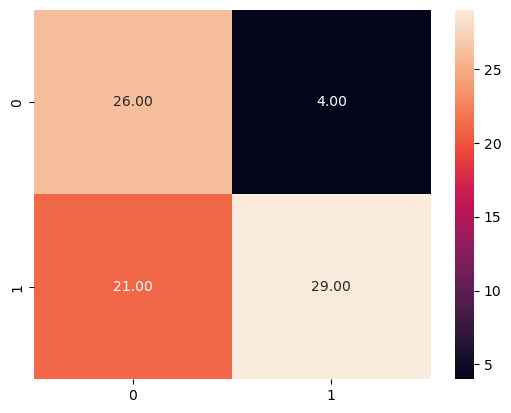

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
kmodel = KNeighborsClassifier()
kmodel.fit(X_train,y_train)
pred = kmodel.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(kmodel.score)

In [64]:
print("Accuray:",kmodel.score(X_test,y_test)*100)

Accuray: 68.75


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

<bound method ClassifierMixin.score of RandomForestClassifier()>


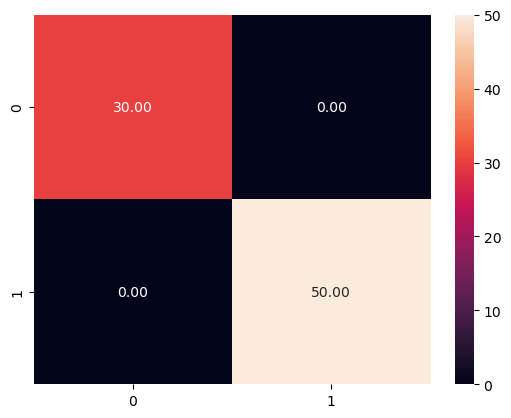

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
rmodel = RandomForestClassifier()
rmodel.fit(X_train,y_train)
pred = rmodel.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(rmodel.score)

In [68]:
print("Accuray:",rmodel.score(X_test,y_test)*100)

Accuray: 100.0


In [69]:
import glob
from keras.models import Sequential,load_model
from keras.layers import Dense
import keras as k

In [70]:
import tensorflow as tf

In [71]:
model=Sequential()
model.add(Dense(256,input_dim=len(X.columns),kernel_initializer=k.initializers.random_normal(seed=13),activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [72]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [73]:
x_model=model.fit(X_train,y_train,epochs=2000,batch_size=X_train.shape[0])

Epoch 1/2000


1/1 [==============================] - 1s 506ms/step - loss: 93.6549 - accuracy: 0.3750
Epoch 2/2000
1/1 [==============================] - 0s 0s/step - loss: 5.8961 - accuracy: 0.3969
Epoch 3/2000
1/1 [==============================] - 0s 16ms/step - loss: 42.6607 - accuracy: 0.6250
Epoch 4/2000
1/1 [==============================] - 0s 0s/step - loss: 65.5825 - accuracy: 0.6250
Epoch 5/2000
1/1 [==============================] - 0s 15ms/step - loss: 74.2142 - accuracy: 0.6250
Epoch 6/2000
1/1 [==============================] - 0s 0s/step - loss: 73.0943 - accuracy: 0.6250
Epoch 7/2000
1/1 [==============================] - 0s 6ms/step - loss: 64.8685 - accuracy: 0.6250
Epoch 8/2000
1/1 [==============================] - 0s 16ms/step - loss: 51.2321 - accuracy: 0.6250
Epoch 9/2000
1/1 [==============================] - 0s 0s/step - loss: 33.3506 - accuracy: 0.6250
Epoch 10/2000
1/1 [==============================] - 0s 17ms/step - loss: 12.0655 - accuracy: 0.6250
Epoch 

In [74]:
pred=model.predict(X_test)
threshold = 0.5
binary_predictions = np.where(pred >= threshold, 1, 0)
binary_predictions

3/3 [==============================] - 0s 0s/step


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1]])

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.98      1.00      0.99        50

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



<AxesSubplot:>

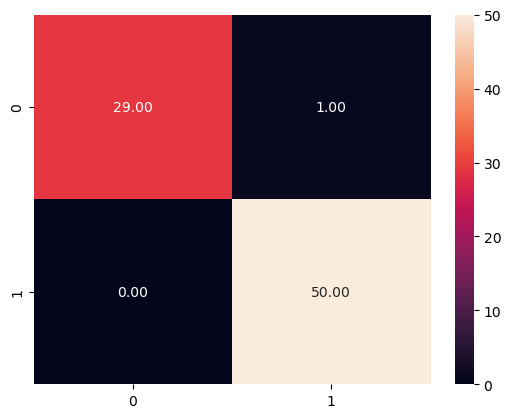

In [75]:
print(classification_report(y_test, binary_predictions))
sns.heatmap(confusion_matrix(y_test, binary_predictions), annot=True, fmt='.2f')

In [76]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, binary_predictions)
print("Accuracy:", accuracy*100)

Accuracy: 98.75


In [77]:
import pickle
pickle.dump(model,open('CKDmodel.pkl', 'wb'))

In [78]:
pmodel=pickle.load(open('CKDmodel.pkl', 'rb'))

In [85]:
pred=pmodel.predict(X_test)
threshold = 0.5
binary_predictions = np.where(pred >= threshold, 1, 0)
binary_predictions

3/3 [==============================] - 0s 7ms/step


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1]])

In [86]:
print(X_test)

     age     bp   al   su    bgr     bu    sc   hemo     wc   rc  htn  dm  pe
241   57   70.0  1.0  0.0  165.0   45.0   1.5  10.40   4200  3.9    0   1   0
97    65   60.0  1.0  0.0   91.0   51.0   2.2  10.00   9100  4.0    1   2   1
59    59  100.0  0.0  0.0  121.0   96.0   6.4   6.60   8000  4.8    1   2   0
355   23   60.0  0.0  0.0   95.0   24.0   0.8  15.00   6300  4.6    0   1   0
144   60   90.0  2.0  0.0  105.0   53.0   2.3  11.10  10500  4.1    0   1   0
..   ...    ...  ...  ...    ...    ...   ...    ...    ...  ...  ...  ..  ..
77    67   70.0  1.0  0.0  102.0   48.0   3.2  11.90   7100  3.7    1   2   1
391   36   80.0  0.0  0.0   85.0   16.0   1.1  15.60   5800  6.3    0   1   0
142   72   90.0  0.0  0.0   84.0  145.0   7.1  12.65   8000  4.8    0   2   0
43    35   80.0  1.0  0.0   79.0  202.0  10.8   7.90   7900  3.1    0   2   0
245   48  100.0  0.0  0.0  103.0   79.0   5.3   6.30   7200  2.6    1   1   0

[80 rows x 13 columns]


In [87]:
pred=pmodel.predict(np.array([57,70.0,1.0,0.0,165.0,45.0,1.5,10.40,4200,3.9,0,1,0]).reshape(1,-1))
threshold = 0.5
binary_predictions = np.where(pred >= threshold, 1, 0)
binary_predictions

1/1 [==============================] - 0s 38ms/step


array([[1]])